## Curso Profesional de Scikit-Learn

### 1. Importancia de los _features_

No siempre más features implica mejores modelos. En realidad, existen técnicas para transformar los features de un dataset o reducirlos, con el objetivo de ahorrar en costo computacional y tiempo. Algunos métodos son:

- PCA
- Regularización
- Balanceo (Oversampling - Undersampling)

#### 1.1 PCA and IPCA

Ideal cuando:

- El dataset tiene un númro alto de features
- Hay alta correlación entre features
- Overfitting
- Alto costo computacional

In [1]:
import pandas as pd
# import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_heart = pd.read_csv('../data/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Separando y estadarizando el dataset:

In [3]:
df_features = df_heart.drop('target', axis=1)
df_target = df_heart['target']

In [4]:
dt_features = StandardScaler().fit_transform(df_features)

Separando el dataset:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target,
        test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


Instanciando y aplicando PCA:

In [6]:
pca = PCA(n_components=3)
pca.fit(X_train, y_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train, y_train)

IncrementalPCA(batch_size=10, n_components=3)

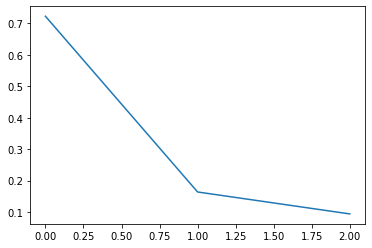

In [7]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

Entrenando el modelo de clasificación:

In [8]:
logistic = LogisticRegression(max_iter=100)

In [9]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
print('SCORE PCA: ', logistic.score(dt_test, y_test))

SCORE PCA:  0.6883116883116883


In [10]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print('SCORE IPCA: ', logistic.score(dt_test, y_test))

SCORE IPCA:  0.6883116883116883


#### 1.2 KPCA

El _kernel_ nos permite proyectar en una dimensión superior nuestro conjunto de datos, que en su dimensión original no es separable pero sí en la nueva dimensión.

In [11]:
from sklearn.decomposition import KernelPCA

In [12]:
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

In [13]:
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

In [14]:
logistic.fit(dt_train, y_train)
print('SCORE KPCA: ', logistic.score(dt_test, y_test))

SCORE KPCA:  0.6818181818181818


### 1.3 Regularización

Consiste en disminuir la complejidad del modelo mediante la penalización aplicada a sus variables menos relevantes. Existen 3 tipos de regularización:

- __L1 Lasso__: eliminación de _features_ que no aportan mucho al modelo
- __L2 Ridge__: disminuir el impacto de ciertos _features_ a nuestro modelo
- __ElasticNet__: una combianción de las dos anteriores

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [17]:
df_felicidad = pd.read_csv('../data/felicidad.csv') 

Difiniamos los _features_ para $X$ y el objetivo $y$:

In [19]:
X = df_felicidad[['gdp', 'family', 'lifexp', 'freedom',
             'corruption', 'generosity', 'dystopia']]
y = df_felicidad['score']

Dividamos los datos:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Instanciamos los tres modelos:

In [24]:
linear_model = LinearRegression().fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

lasso_model = Lasso(alpha=0.02).fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)

ridge_model = Ridge(alpha=1).fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)

Comparando las pérdidas de cada modelo:

In [25]:
linear_loss = mean_squared_error(y_test, y_linear_pred)
print('LINEAR LOSS: ', linear_loss)

linear_lasso = mean_squared_error(y_test, y_lasso_pred)
print('LASSO LOSS: ', linear_lasso)

ridge_loss = mean_squared_error(y_test, y_ridge_pred)
print('RIDGE LOSS: ', ridge_loss)

LINEAR LOSS:  9.942446656008672e-08
LASSO LOSS:  0.06432937746477181
RIDGE LOSS:  0.0070117342039430625


Coeficientes:

In [26]:
print('Coef LASSO: ', lasso_model.coef_)
print('Coef RIDGE: ', ridge_model.coef_)

Coef LASSO:  [1.38406498 0.79751556 0.44931943 0.73778093 0.         0.13232925
 0.97172054]
Coef RIDGE:  [1.1026071  0.93168941 0.85290581 0.88939285 0.61773747 0.74436685
 0.9855004 ]


Podemos ver que efectivamente el modelo L1 ha llevado el uno de los coeficientes (weights) a valor 0, no así la regularización L2.

Por otro lado, los valores de los coeficientes nos indican los _features_ que están teniendo mayor impacto en la predicción del _target_.